In [1]:
import pandas as pd

df = pd.read_excel("Online Retail.xlsx")

df1 = df

In [2]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 資料前處理
* 檢查重要欄位終是否有缺失值
* 選定所欲分析的顧客來源國家
* 消費金額與商品單價必須大於0
* 交易日期必須是當天以前

In [4]:
df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [5]:
customer_country = df1[['Country' , 'CustomerID']].drop_duplicates()

customer_country

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [6]:
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID' , ascending = False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [7]:
df2 = df1.loc[df1['Country'] == 'United Kingdom']
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [11]:
df2.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [12]:
df3 = df2[pd.notnull(df2['CustomerID'])]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [13]:
df3.UnitPrice.min()

0.0

In [14]:
df3.Quantity.min()

-80995

In [15]:
df4 = df3[(df3['Quantity'] > 0) & (df3['UnitPrice'] > 0)]
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [16]:
df4.shape

(354321, 8)

In [17]:
for i in df4.columns:
    count = df4[i].nunique()
    print(i , ":" , count)

InvoiceNo : 16646
StockCode : 3645
Description : 3844
Quantity : 293
InvoiceDate : 15612
UnitPrice : 402
CustomerID : 3920
Country : 1


In [18]:
df4['TotalPrice'] = df4['Quantity'] * df4['UnitPrice']
df4

<ipython-input-18-061054eba084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['TotalPrice'] = df4['Quantity'] * df4['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [20]:
df4['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [21]:
import datetime as dt

NOW = dt.datetime(2011,12,10)

df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])

df4

<ipython-input-21-84ad91a5e6cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


# 建立RFM指標 

In [22]:
NOW

datetime.datetime(2011, 12, 10, 0, 0)

In [23]:
NOW - dt.datetime(2010,12,1)

datetime.timedelta(days=374)

In [24]:
rfmTable = df4.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (NOW - x.max()).days , 'InvoiceNo' : lambda x : len(x) , 'TotalPrice' : lambda x : x.sum()})

rfmTable

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [37]:
rfmTable.rename(columns = {'InvoiceDate' : 'recency' , 
                                              'InvoiceNo' : 'frequency' , 
                                              'TotalPrice' : 'monetary'} , inplace = True)
rfmTable

,recency,frequency,Monetary,r_quantile,f_quantile
CustomerID,,,,,
12346.0,325,1,77183.60,4,4
12747.0,2,103,4196.01,1,1
12748.0,0,4595,33719.73,1,1
12749.0,3,199,4090.88,1,1
12820.0,3,59,942.34,1,2
...,...,...,...,...,...
18280.0,277,10,180.60,4,4
18281.0,180,7,80.82,4,4
18282.0,7,12,178.05,1,4


# 製造RFM區間

In [27]:
quantiles = rfmTable.quantile(q = [0.25 , 0.5 , 0.75])

quantiles

,recency,frequency,Monetary
0.25,17.0,17.00,300.280
0.50,50.0,41.00,652.280
0.75,142.0,99.25,1576.585


In [31]:
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 300.28000000000003, 0.5: 652.28, 0.75: 1576.585}}

In [32]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [33]:
segmented_rfm = rfmTable

segmented_rfm['r_quantile'] = segmented_rfm['recency'].apply(RScore , args = ('recency' , quantiles))

segmented_rfm

,recency,frequency,Monetary,r_quantile
CustomerID,,,,
12346.0,325,1,77183.60,4
12747.0,2,103,4196.01,1
12748.0,0,4595,33719.73,1
12749.0,3,199,4090.88,1
12820.0,3,59,942.34,1
...,...,...,...,...
18280.0,277,10,180.60,4
18281.0,180,7,80.82,4
18282.0,7,12,178.05,1


In [35]:
segmented_rfm['f_quantile'] = segmented_rfm['frequency'].apply(FMScore , args = ('frequency' , quantiles))

segmented_rfm

,recency,frequency,Monetary,r_quantile,f_quantile
CustomerID,,,,,
12346.0,325,1,77183.60,4,4
12747.0,2,103,4196.01,1,1
12748.0,0,4595,33719.73,1,1
12749.0,3,199,4090.88,1,1
12820.0,3,59,942.34,1,2
...,...,...,...,...,...
18280.0,277,10,180.60,4,4
18281.0,180,7,80.82,4,4
18282.0,7,12,178.05,1,4


In [38]:
segmented_rfm['m_quantile'] = segmented_rfm['Monetary'].apply(FMScore , args = ('Monetary' , quantiles))

segmented_rfm

,recency,frequency,Monetary,r_quantile,f_quantile,m_quantile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4595,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2
...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4
18281.0,180,7,80.82,4,4,4
18282.0,7,12,178.05,1,4,4


In [39]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quantile.map(str) + segmented_rfm.f_quantile.map(str) + segmented_rfm.m_quantile.map(str)
segmented_rfm

,recency,frequency,Monetary,r_quantile,f_quantile,m_quantile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4595,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444
18281.0,180,7,80.82,4,4,4,444
18282.0,7,12,178.05,1,4,4,144


In [40]:
segmented_rfm[segmented_rfm['RFMScore'] == '111'].sort_values('Monetary' , ascending = False)

,recency,frequency,Monetary,r_quantile,f_quantile,m_quantile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
...,...,...,...,...,...,...,...
14759.0,4,102,1625.97,1,1,1,111
16987.0,3,129,1625.05,1,1,1,111
15172.0,8,110,1624.05,1,1,1,111


In [41]:
pd.set_option("max_rows" , None)

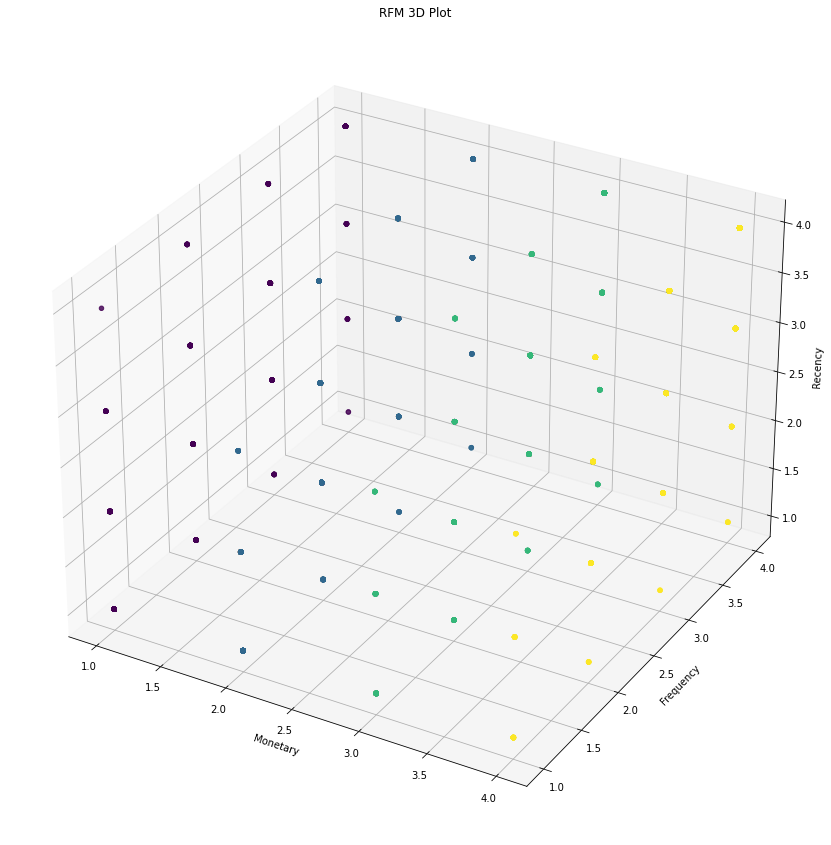

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = segmented_rfm['r_quantile']

y = segmented_rfm['f_quantile']

z = segmented_rfm['m_quantile']

fig = plt.figure(figsize=(15, 15))
# 建立3D圖

ax = plt.subplot(projection='3d') 
# 將數據畫上

ax.scatter(x, y, z, c= x) # c指資料點漸層顏色

# 設定座標軸名稱

plt.title("RFM 3D Plot")

ax.set_zlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_xlabel('Monetary')


plt.show()